We will use yfinance to to load SNP500 price data.

In [1]:
# import lib
import yfinance as yf

In [2]:
# ^GSPC is ticker code for SNP500
sp500 = yf.Ticker("^GSPC")

# get data from beginning of SNP500
sp500 = sp500.history(period = 'max')

sp500.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,0.0,0.0
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,0.0,0.0
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,0.0,0.0
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0


We are provided with many columns:
- `Open`: Market opening price
- `High`: Highest price in that trading day
- `Low`: Lowest price in that trading day
- `Close`: Market closing price
- `Volume`: Number of shares traded in a stock, or contracts traded in futuress/options
- `Dividends`: Payment to shareholders that consists of additional shares of that stock
- `Stock Splits`: when more shares are issued to current shareholders

In [3]:
# see index of snp500 data
sp500.index

DatetimeIndex(['1927-12-30 00:00:00-05:00', '1928-01-03 00:00:00-05:00',
               '1928-01-04 00:00:00-05:00', '1928-01-05 00:00:00-05:00',
               '1928-01-06 00:00:00-05:00', '1928-01-09 00:00:00-05:00',
               '1928-01-10 00:00:00-05:00', '1928-01-11 00:00:00-05:00',
               '1928-01-12 00:00:00-05:00', '1928-01-13 00:00:00-05:00',
               ...
               '2024-07-16 00:00:00-04:00', '2024-07-17 00:00:00-04:00',
               '2024-07-18 00:00:00-04:00', '2024-07-19 00:00:00-04:00',
               '2024-07-22 00:00:00-04:00', '2024-07-23 00:00:00-04:00',
               '2024-07-24 00:00:00-04:00', '2024-07-25 00:00:00-04:00',
               '2024-07-26 00:00:00-04:00', '2024-07-29 00:00:00-04:00'],
              dtype='datetime64[ns, America/New_York]', name='Date', length=24259, freq=None)

Note: Index is the date and time of the market opening

Now, time to clean and visualise the pricing of snp500

In [4]:
# Dividends and Stock Splits are more for indiv stocks, not index, so we will remove these columns
del sp500['Dividends']
del sp500['Stock Splits']

sp500.head()

,Open,High,Low,Close,Volume
Date,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0


In stock market, data from "ancient times" don't matter much, since market structure might have evolved or shifted fundamentally. So, we will remove rows containing data any earlier than 1990.

In [5]:
sp500 = sp500.loc['1990-01-01':]

sp500

,Open,High,Low,Close,Volume
Date,,,,,
1990-01-02 00:00:00-05:00,353.399994,359.690002,351.980011,359.690002,162070000
1990-01-03 00:00:00-05:00,359.690002,360.589996,357.890015,358.760010,192330000
1990-01-04 00:00:00-05:00,358.760010,358.760010,352.890015,355.670013,177000000
1990-01-05 00:00:00-05:00,355.670013,355.670013,351.350006,352.200012,158530000
1990-01-08 00:00:00-05:00,352.200012,354.239990,350.540009,353.790009,140110000
...,...,...,...,...,...
2024-07-23 00:00:00-04:00,5565.299805,5585.339844,5550.899902,5555.740234,3500210000
2024-07-24 00:00:00-04:00,5505.839844,5508.040039,5419.979980,5427.129883,3945550000
2024-07-25 00:00:00-04:00,5428.700195,5491.589844,5390.950195,5399.220215,4592120000


In [6]:
# handle missing values using forward filling
sp500.fillna(method = 'ffill', inplace=True)

sp500.info()
sp500.head()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8709 entries, 1990-01-02 00:00:00-05:00 to 2024-07-29 00:00:00-04:00
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    8709 non-null   float64
 1   High    8709 non-null   float64
 2   Low     8709 non-null   float64
 3   Close   8709 non-null   float64
 4   Volume  8709 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 408.2 KB


,Open,High,Low,Close,Volume
Date,,,,,
1990-01-02 00:00:00-05:00,353.399994,359.690002,351.980011,359.690002,162070000
1990-01-03 00:00:00-05:00,359.690002,360.589996,357.890015,358.760010,192330000
1990-01-04 00:00:00-05:00,358.760010,358.760010,352.890015,355.670013,177000000
1990-01-05 00:00:00-05:00,355.670013,355.670013,351.350006,352.200012,158530000
1990-01-08 00:00:00-05:00,352.200012,354.239990,350.540009,353.790009,140110000


#### Plots

Now, we will move on to plotting graphs to visualise the distributions.

In [7]:
# lib
import matplotlib.pyplot as plt

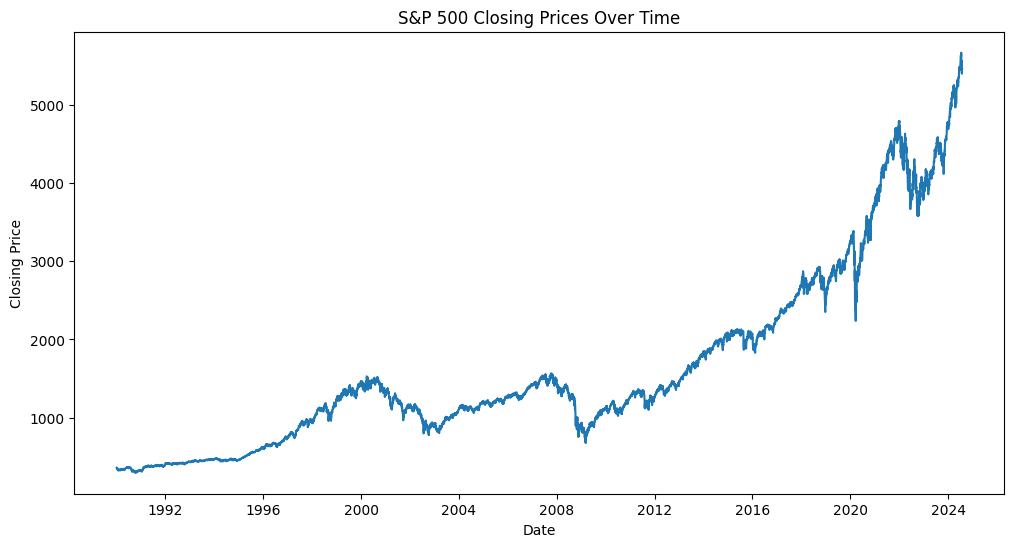

In [8]:
# Plot closing prices over time
plt.figure(figsize=(12, 6))
plt.plot(sp500.index, sp500['Close'])
plt.title('S&P 500 Closing Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.show()

### Findings:

---

##### Early 1990s Stability

From 1990 to around 1995, snp500 index shows relatively stable increasing trend.

---

### ## Late 1990s Bull Market

significant increase in the index is observed from 1995 to 2000, reflecting the dot-com bubble period where tech stocks soared.

---

##### Dot-com bubble burst

In 2000, index peaks and then sharply drops, marking the burst of the dot-com bubble. This trend continues till around 2002-2003.

---

##### Mid-2000s recovery and financial crisis

from 2003 to 2007, index recovers and reaches new highs. However, this is followed by a stepp decline in 2008-2009 due to global financial crisis.

---

##### Post-2009 bull market

starting 2009, snp500 embarks on a long-term upward trend, driven by economic recovery and growth, quantitative easing, and technological advancements.

---

##### COVID-19 pandemic

In early 2020, sharp but brief dip is observed, corresponding to the onset of COVID-19 pandemic, however, market quickly recovers and continues to rise.

---

##### Recent Trends:

from 2020 onwards, index shows steep upward trajectory, reaching new all-time highs by 2024. This reflects post-pandemic recovery, government stimululs and more economic activity.

### Analysis

1. Market Cycles: plot clearly shows the cyclical nature of stock market with periods of bull and bear markets.
2. Economic Events: major economic events and crises have huge impact on snp500 index, causing significant fluctuations.
3. long-term growth: Despite periodic drops, overall longterm trend of snp500 is upward, showing sustained economic growth and increasing corporate profitability over time.
4. Investment Impliciations: Investors can see that although short-term market movements can be volatile, holding invesmtnets over long term has historically resulted in positive returns.
5. Risk and Volatility: the plot highlights the importance of understanding market volatility and risks associated with short-term investments. Significant downturns can occur, but market has shown resilience anmmd recovery over long term.

---

### Conclusion

snp500 closing prices over time provide valuable insights into market behaviour, economic cycles and long-term growth trends. Analysing such a plot helps investors understand the broader market context, identify periods of risk and opportunity, and make informed investment decisions based on historical performance.

<Figure size 1200x600 with 0 Axes>

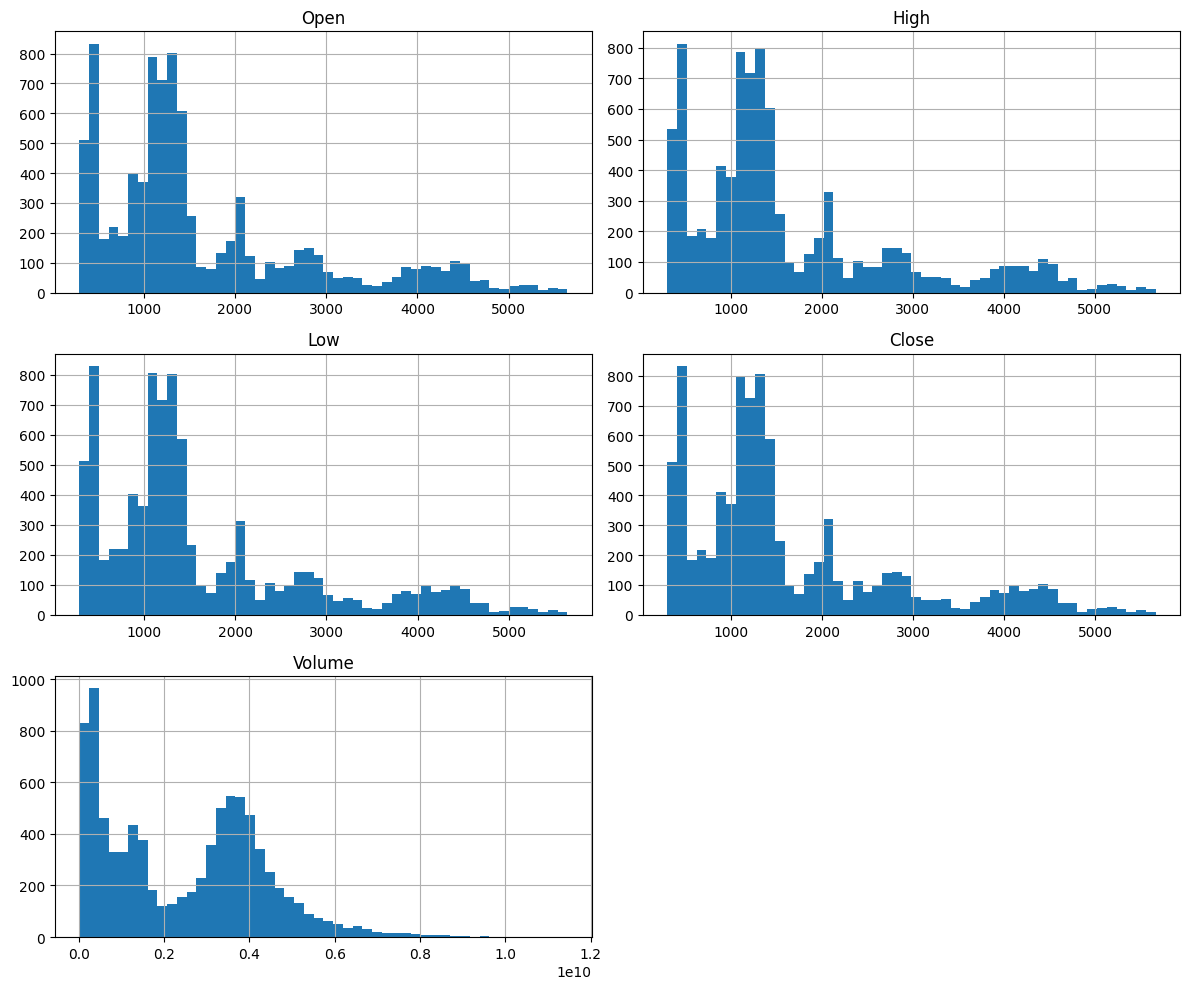

In [9]:
# visualize distribution of key features

plt.figure(figsize=(12, 6))
sp500[['Open', 'High', 'Low', 'Close', 'Volume']].hist(bins=50, figsize=(12, 10))
plt.tight_layout()
plt.show()

## Findings

---

#### `Open`, `High`, `Low`, `Close` Prices
- Bimodal distribution across all, with 2 distinct peaks.
- First peak: around 500-1500 range. This indicates that a significant number of trading days had prices within this range.
- Second peak: less pronounced and appears around 2000-3500 range. Represents the more recent years where the index values have been higher.
- Tail: Long tail extending towards the right, indicating that while most trading days had prices in the lower range, there are notable instances of much higher prices.

---

#### `Volume`
- Right skewed: most trading days have lower trading volumes, and a few days show exceptionally high volumes.
- Concentration: majority of trading volumes are concentrated below `0.2e10`, with a gradual decline as volume increases.

## Detailed Analysis

---

#### Historical Price Ranges
- Bimodal distribution suggests different eras in the snp500's history. Lower peak likely corresponds to earlier part of the data set (1990 to early 2000s), while higher peak corresponds to more recent years.
- Presence of 2 distinct peaks reflects significant growth in the index over the years, with newer highs being reached in the more recent times.

---

#### Market Dynamics
- Wide range of prices indicates substantial growth and volatility in the market. The snp500 has seen considerable fluctuations, but overall trend has been upwards, as observed in the closing prices plot.
- Increase in trading volume over time can be attributed to greater market participation, technological advancements in trading, and increased interest in financial markets.

---

#### Investment Insights
- Bimodal nature of price distributions underscores the importance of understanding historical market phases for long-term investment strategies.
- Right-skewed volume distribution highlights importance of liquidity in the market. Higher volumes often correspond to significant market events, which can provide opportunities for short-term trading or inform long-term investment decisions.

### Conclusion

Distributions of the key features in the snp500 dataset reveal important insights into the historical behavior of the market. The data shows substantial growth in index prices over the years, marked by significant volatility and periods of high trading volumes. Understanding these distributions can help investors recognize historical trends, evaluate market dynamics, and make informed deicions based on historical patterns and market behavior.

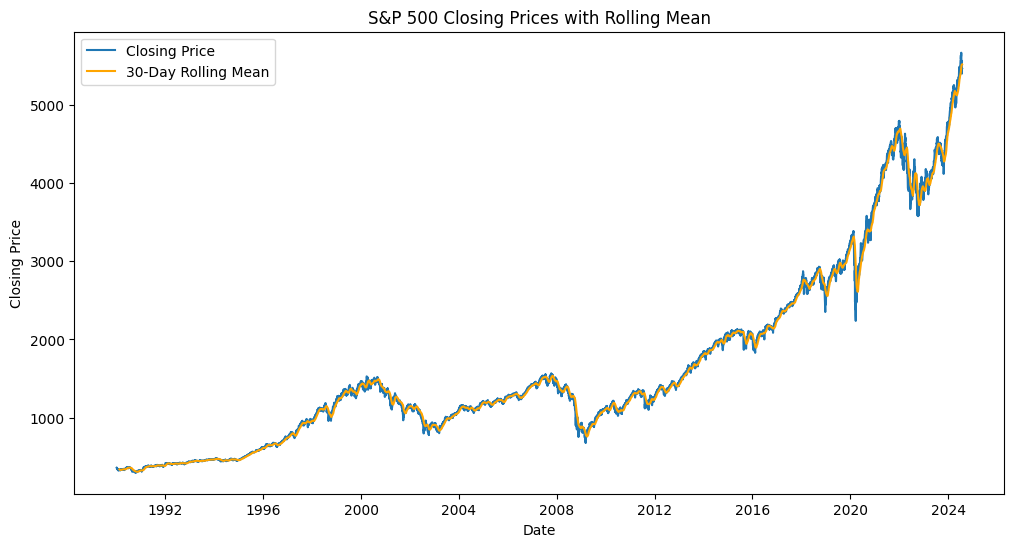

In [11]:
# Create a rolling mean
sp500['Rolling_Mean'] = sp500['Close'].rolling(window=30).mean()

plt.figure(figsize=(12, 6))
plt.plot(sp500.index, sp500['Close'], label='Closing Price')
plt.plot(sp500.index, sp500['Rolling_Mean'], label='30-Day Rolling Mean', color='orange')
plt.title('S&P 500 Closing Prices with Rolling Mean')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.show()

## Findings

---

#### Overall upward trend
- snp500 has shown consistent upward trend over long term. Despite periodic declines, index continued to reach new highs, reflecting overall economic growth and increasing corporate earnings.

---

#### Periods of Volatility
- Dot-com Bubble (2000-2002): significant rise followed by sharp decline representing boom and bust of tech sector.
- Global Financial Crisis (2008-2009): steep decline in index, reflecting severe economic downturn during period.
- COVID-19 Pandemic (2020): rapid drop follwoed by swift recovery, indicating market's initial panic and subsequent confidence in economic recovery measures.

---

#### Rolling Mean Smoothing
- 30-day rolling mean (orange line) closely follows actual closing prices (blue line) but smooths out some of the short-term noise.
- Rolling mean provides clearer picture of the underlying trend by reducing the impact of daily volatility.

---

#### Short-term Fluctuations
- Plot shows numerous short-term fluctuations around general trend. These fluctuations are smoothed out by the rolling mean, which helps to highlight the longer-term trend more effectively.

---

#### Market Recoveries
- Post-crisis recoveries are evident, with rolling mean capturing gradual uptrend following significant downturns. For example, recovery after dot-com bubble, financial crisis, and COVID-19 pandemic.

## Conclusion

The plot of S&P 500 closing prices with the 30-day rolling mean provides valuable insights into the long-term trends and stability of the index. The rolling mean effectively smooths out short-term fluctuations, revealing the underlying growth trend. Despite periodic downturns due to economic crises, the S&P 500 has demonstrated resilience and continued growth, reaffirming its status as a stable investment option. This analysis underscores the importance of long-term investing and the usefulness of tools like the rolling mean in understanding market trends.

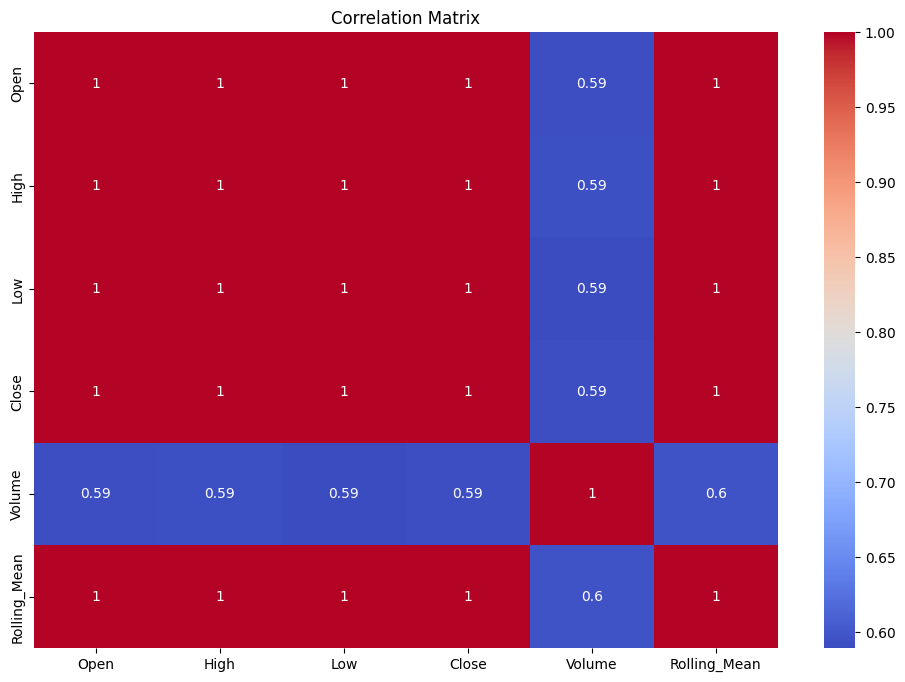

In [13]:
# Correlation matrix
import seaborn as sns

plt.figure(figsize=(12, 8))
sns.heatmap(sp500.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

### Setting up Target Variable

*Problem*: we can very accurately predict the absolute price but we can still lose a lot of money because if we are buying and selling stocks, we don't care about getting an accurate price, but rather the direction (whether it will go up or down).

Target: will stock go up/down tomorrow at closing

In [ ]:
# create column for target, assign value to next day's close
sp500['Tomorrow'] = sp500['Close'].shift(-1)

# create column for Target: bool (1 for tomorrow higher than today, 0 for tomorrow lower than today)
sp500['Target'] = (sp500['Tomorrow'] > sp500['Close']).astype(int)

sp500